# Analysis of sold cars in Estonia

Data is taken from official source - https://www.transpordiamet.ee/soidukitega-tehtud-toimingute-statistika

Period - 5 years.

Only new cars where used in this analysis.


In [1]:
%reload_ext autoreload
%autoreload 0

# fix imports
import sys

sys.path.append("..")

In [2]:
from pathlib import Path
import pandas as pd

from mnt_sum import (
    get_summary,
    COLUMNS,
    COLUMN_SHORT_NAME,
    COLUMN_REG_DATE,
    COLUMN_CUSTOMER,
    PRIVATE_CUSTOMER,
    COLUMN_ENGINE_TYPE,
    COLUMN_COUNT,
    COLUMN_TRANSMISSION,
)

df_o = pd.concat([get_summary(Path(f"../data/{year}")) for year in range(2018, 2025)])
df_o = df_o[COLUMNS + [COLUMN_REG_DATE]]
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121590 entries, 42 to 2656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Mark             121590 non-null  object 
 1   Mudel            121590 non-null  string 
 2   short name       121590 non-null  object 
 3   Mootori tüüp     121590 non-null  object 
 4   Mootori maht     121590 non-null  Int64  
 5   Mootori võimsus  121590 non-null  Float64
 6   Käigukasti tüüp  50496 non-null   string 
 7   Linn             121590 non-null  object 
 8   Tüüp (isik)      121590 non-null  object 
 9   Arv              121590 non-null  Int64  
 10  Värv             81198 non-null   string 
 11  Esm reg aasta    121590 non-null  Int16  
dtypes: Float64(1), Int16(1), Int64(2), object(5), string(3)
memory usage: 11.8+ MB


In [3]:
df_o.head(5)

,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Käigukasti tüüp,Linn,Tüüp (isik),Arv,Värv,Esm reg aasta
42,ALFA ROMEO,GIULIA,ALFA ROMEO GIULIA,BENSIIN_KATALYSAATOR,1995,206.0,<NA>,Määramata,JÜRIIDILINE,1,<NA>,2018
43,AUDI,A1 SPORTBACK,AUDI A1,BENSIIN_KATALYSAATOR,1395,110.0,<NA>,Tallinn,FÜÜSILINE,1,<NA>,2018
44,AUDI,A4 AVANT,AUDI A4,BENSIIN_KATALYSAATOR,1984,185.0,<NA>,Määramata,FÜÜSILINE,1,<NA>,2018
45,AUDI,A4 AVANT,AUDI A4,DIISEL,1968,140.0,<NA>,Tallinn,JÜRIIDILINE,1,<NA>,2018
46,AUDI,A4 LIMOUSINE,AUDI A4,BENSIIN_KATALYSAATOR,1395,110.0,<NA>,Tartu,FÜÜSILINE,1,<NA>,2018


# Most popular cars

In [4]:
df_models_year = (
    df_o.groupby([COLUMN_SHORT_NAME], as_index=False)["Arv"]
    .sum()
    .sort_values("Arv", ascending=False)
    .reset_index(drop=True)
)

LIMIT = 10

df_models_year.head(LIMIT)

,short name,Arv
0,TOYOTA RAV4,8842
1,SKODA OCTAVIA,7905
2,TOYOTA COROLLA,6854
3,SKODA KODIAQ,5157
4,KIA SPORTAGE,4268
5,RENAULT CLIO,4034
6,KIA CEED,3556
7,VOLKSWAGEN TIGUAN,3097
8,TOYOTA C-HR,2836
9,DACIA DUSTER,2782


# History

# Sold cars

   Esm reg aasta    Arv
0           2018  23806
1           2019  22248
2           2020  19284
3           2021  22623
4           2022  20561
5           2023  22991
6           2024  27565


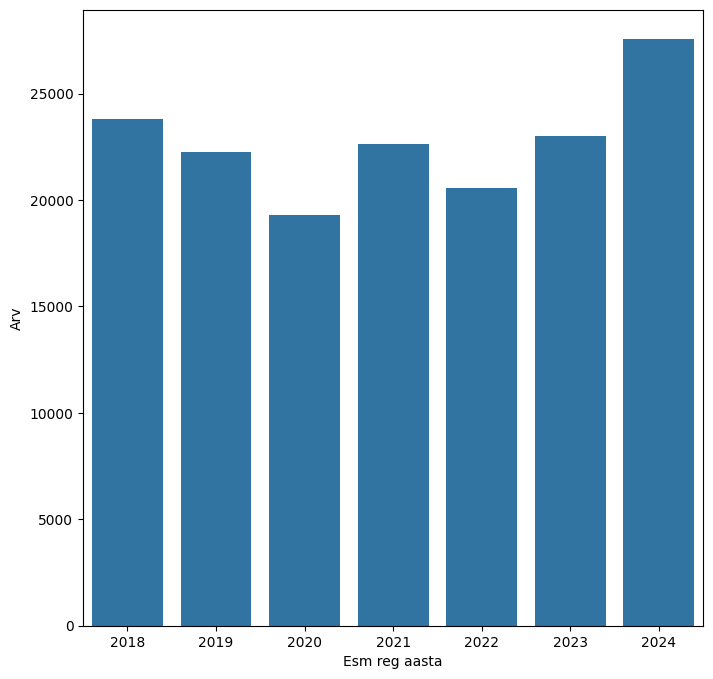

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_history(data_frame, column=None, print_limit=5):
    selection = [COLUMN_REG_DATE]
    if column:
        selection.append(column)
    x = COLUMN_REG_DATE
    y = COLUMN_COUNT
    data = (
        data_frame.groupby(selection, as_index=False)[y]
        .sum()
        .sort_values(y, ascending=False)
        .reset_index(drop=True)
    )

    data.index += 1
    plt.figure(figsize=(8, 8))
    sns.barplot(x=x, y=y, data=data, hue=column)
    print(data.sort_values(selection).reset_index(drop=True).head(print_limit))
    if print_limit:
        print("...")


plot_history(df_o, print_limit=None)

## By customer type

   Esm reg aasta   Tüüp (isik)    Arv
0           2018     FÜÜSILINE  10876
1           2018   JÜRIIDILINE  12523
2           2018   RIIGIASUTUS    404
3           2018  VÄLISMAALANE      3
4           2019    ASUTAMISEL      2
...


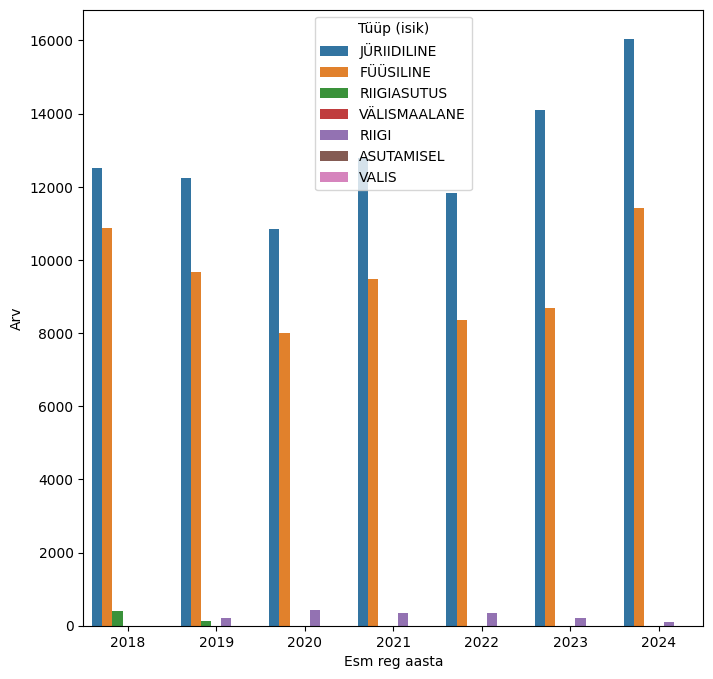

In [6]:
plot_history(df_o, COLUMN_CUSTOMER)

## By transmission

   Esm reg aasta      Käigukasti tüüp   Arv
0           2022             AUTOMAAT  8260
1           2022      AUTOMAT_MANUAAL    12
2           2022                  CVT  2941
3           2022                  DCT    23
4           2022  KONSTANTNE_ÜLEKANNE   144
...


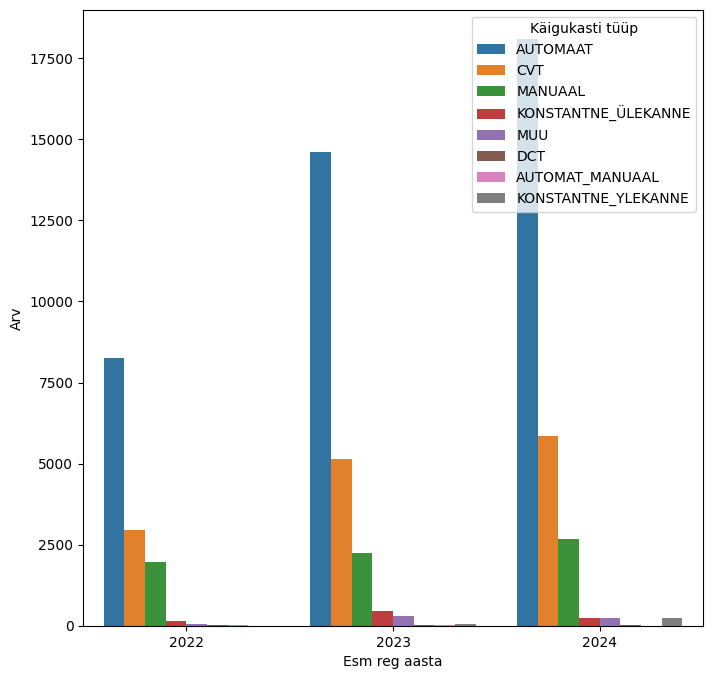

In [7]:
plot_history(df_o, COLUMN_TRANSMISSION)

## By engine type

   Esm reg aasta          Mootori tüüp    Arv
0           2018               BENSIIN    163
1           2018       BENSIIN_HYBRIID   1421
2           2018  BENSIIN_KATALYSAATOR  16239
3           2018                   CNG      3
4           2018                DIISEL   5830
...


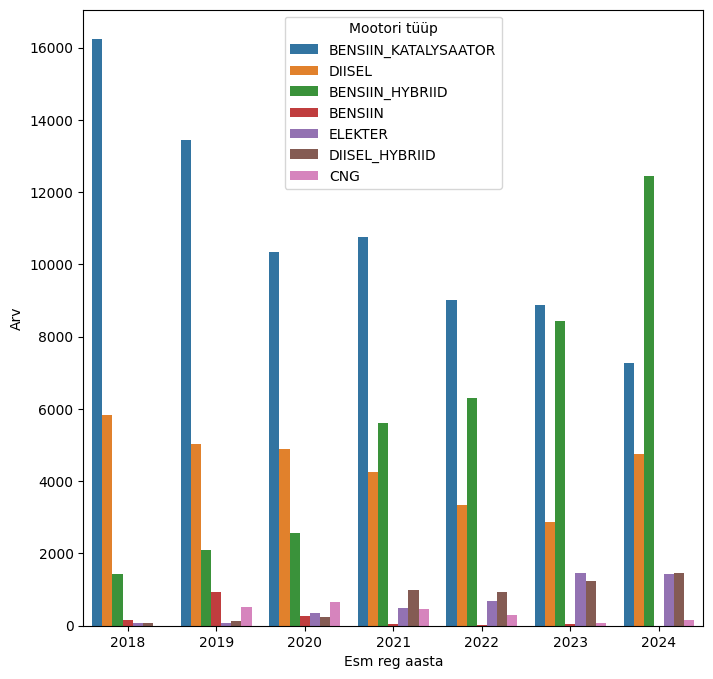

In [8]:
plot_history(df_o, COLUMN_ENGINE_TYPE)

# SUV vs non SUV

   Esm reg aasta    SUV    Arv
0           2018  False  14431
1           2018   True   9375
2           2019  False  12830
3           2019   True   9418
4           2020  False  10427
...


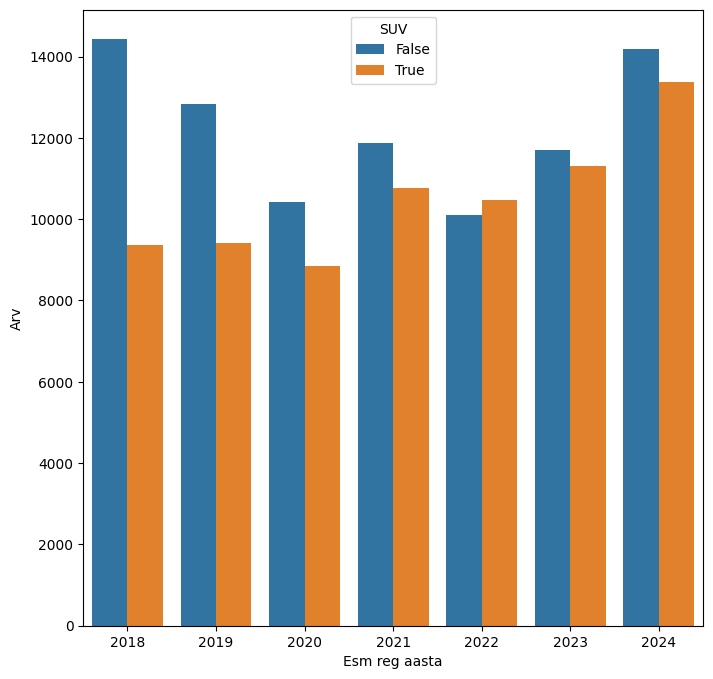

In [16]:
import yaml
from utils.file import read_file

SUVS = set(yaml.safe_load(read_file("../data/suvs.yaml").lower()))

df_o["SUV"] = df_o[COLUMN_SHORT_NAME].str.lower().isin(SUVS)

plot_history(df_o, "SUV")

# Marks overview

In [9]:
df_marks_year = (
    df_o.groupby(["Mark", COLUMN_REG_DATE], as_index=False)["Arv"]
    .sum()
    .sort_values("Arv", ascending=False)
    .reset_index(drop=True)
)

df_marks_year.head()

,Mark,Esm reg aasta,Arv
0,SKODA,2024,5503
1,TOYOTA,2024,4794
2,TOYOTA,2022,4456
3,TOYOTA,2023,4211
4,TOYOTA,2021,3851


In [10]:
from matplotlib.colors import LinearSegmentedColormap


def sort_and_plot(_df, sortby=2024, limit=20, main_groupby=COLUMN_SHORT_NAME):
    cm = LinearSegmentedColormap.from_list(
        name="ryg",
        colors=["red", "yellow", "green"],
    )

    df_group = (
        _df.groupby([main_groupby, COLUMN_REG_DATE], as_index=False)["Arv"]
        .sum()
        .sort_values("Arv", ascending=False)
        .reset_index(drop=True)
    )

    df_h = (
        df_group.pivot(index=main_groupby, columns=COLUMN_REG_DATE, values="Arv")
        .sort_values([sortby], ascending=False)
        .astype("float64")
    )

    df_h = df_h.head(limit)

    df_h.style.format(precision=0)
    df_colorized = df_h.style.background_gradient(cmap=cm).format(precision=0)

    return df_colorized


sort_and_plot(df_marks_year, main_groupby="Mark")

Esm reg aasta,2018,2019,2020,2021,2022,2023,2024
Mark,,,,,,,
SKODA,2840,3079,2884,3157,2769,3358,5503
TOYOTA,3665,3444,3362,3851,4456,4211,4794
VOLKSWAGEN,1690,1726,1197,1968,1595,1228,2464
KIA,1590,1529,1259,1867,1636,1813,1807
RENAULT,2592,2409,2021,1152,784,873,1545
DACIA,943,1080,706,742,725,750,1238
AUDI,385,390,496,539,1000,2544,1093
PEUGEOT,1128,1055,1173,1393,816,880,961
HYUNDAI,862,571,621,971,681,690,799


# Total overview

In [11]:
sort_and_plot(df_o)

Esm reg aasta,2018,2019,2020,2021,2022,2023,2024
short name,,,,,,,
SKODA OCTAVIA,911,1031,1054,1110,888,1052,1859
SKODA KODIAQ,462,675,536,480,691,737,1576
TOYOTA COROLLA,378,1091,977,922,966,1151,1369
TOYOTA RAV4,883,1194,1400,1440,1526,1311,1088
VOLKSWAGEN TIGUAN,398,449,288,337,369,327,929
KIA SPORTAGE,602,571,399,633,641,599,823
TOYOTA YARIS CROSS,nan,nan,nan,49,498,510,619
DACIA DUSTER,357,378,327,400,347,413,560
SKODA SUPERB,566,441,336,292,263,283,558


# Private owners

In [12]:
df_private = df_o[df_o[COLUMN_CUSTOMER].apply(lambda x: PRIVATE_CUSTOMER in x)]

sort_and_plot(df_private)

Esm reg aasta,2018,2019,2020,2021,2022,2023,2024
short name,,,,,,,
SKODA KODIAQ,266,390,330,249,321,350,784
SKODA OCTAVIA,420,482,598,492,289,373,716
TOYOTA COROLLA,203,469,458,431,301,453,690
TOYOTA RAV4,557,736,694,736,783,771,591
KIA SPORTAGE,350,287,202,405,350,294,567
VOLKSWAGEN TIGUAN,262,318,195,221,201,182,410
TOYOTA YARIS CROSS,nan,nan,nan,22,293,348,359
SUBARU OUTBACK,240,203,99,205,174,270,327
TOYOTA C-HR,322,245,191,218,196,153,289


# Private owners electric cars

In [13]:
df_private_e = df_private[df_private[COLUMN_ENGINE_TYPE] == "ELEKTER"]

sort_and_plot(df_private_e)

/home/kirill/workspace/github/playground/.venv/lib/python3.12/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/kirill/workspace/github/playground/.venv/lib/python3.12/site-packages/pandas/io/formats/style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


Esm reg aasta,2018,2019,2020,2021,2022,2023,2024
short name,,,,,,,
SKODA ENYAQ,nan,nan,nan,22,27,59,79
VOLVO EX30,nan,nan,nan,nan,nan,nan,53
TESLA MODEL 3,nan,nan,11,5,11,18,42
HYUNDAI IONIQ5,nan,nan,nan,4,11,22,42
TESLA MODEL Y,nan,nan,nan,1,1,63,41
GREAT WALL MOTOR COMPANY LIMITED ORA FUNKY CAT,nan,nan,nan,nan,nan,nan,36
TOYOTA BZ4X,nan,nan,nan,nan,nan,7,30
VOLKSWAGEN ID.4,nan,nan,nan,6,3,19,20
SUBARU SOLTERRA,nan,nan,nan,nan,nan,14,14


# Private owners hybrid cars

In [14]:
df_private_h = df_private[
    df_private[COLUMN_ENGINE_TYPE].apply(lambda x: "HYBRIID" in x)
]

sort_and_plot(df_private_h)

Esm reg aasta,2018,2019,2020,2021,2022,2023,2024
short name,,,,,,,
TOYOTA COROLLA,nan,207,213,276,187,427,684
TOYOTA RAV4,279,314,291,347,357,412,556
KIA SPORTAGE,nan,nan,1,29,222,247,517
TOYOTA YARIS CROSS,nan,nan,nan,13,203,330,325
SKODA OCTAVIA,nan,nan,30,135,67,144,294
TOYOTA C-HR,177,155,120,218,196,153,289
SKODA KODIAQ,nan,nan,nan,nan,nan,nan,259
HYUNDAI TUCSON,nan,nan,8,151,177,133,236
VOLKSWAGEN TIGUAN,nan,nan,nan,11,15,9,192


# Private owners diesel cars

In [15]:
df_private_h = df_private[df_private[COLUMN_ENGINE_TYPE].apply(lambda x: "DIISEL" in x)]

sort_and_plot(df_private_h)

Esm reg aasta,2018,2019,2020,2021,2022,2023,2024
short name,,,,,,,
SKODA KODIAQ,137,151,115,90,167,174,394
SKODA OCTAVIA,61,63,184,107,78,144,313
VOLKSWAGEN TIGUAN,147,253,69,22,49,53,151
KIA SPORTAGE,189,107,59,102,35,57,98
SKODA SUPERB,57,62,28,30,19,23,79
PEUGEOT 5008,93,50,37,109,51,59,59
AUDI Q5,4,27,9,15,17,23,50
DACIA DUSTER,119,49,47,47,58,76,46
TOYOTA LAND CRUISER,nan,nan,nan,nan,nan,nan,41
